# Survival Analysis method used on Employee Turnover data to predict impact of the presence of a coach
dataset info:

Title: Employee Turnover Dataset

Dataset Author: Davin Wijaya

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/davinwijaya/employee-turnover

Date Accessed: September 28, 2023

In [22]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from lifelines import KaplanMeierFitter

In [23]:
#creating our dataframe using our csv document
with open('turnover.csv', 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv('turnover.csv', encoding=result['encoding'])

In [24]:
#initial exploratory data analysis
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


        stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1      8.3  
2      4.8      8.3 

Descriptions for all of the features studied:
stag: Experience (time)
event: Employee turnover
gender: Employee's gender, female(f), or male(m) #this feature is limited to two genders at the time when the dataset was downloaded and is not as an outcme of this analysts study design
age: Employee's age (year)
industry: Employee's industry
profession: Employee's profession
traffic: From what pipieline employee came to the company
coach: Presence of a coach (training) on probation
head_gender: head (supervisor) gender #this feature is limited to two genders at the time when the dataset was downloaded and is not as an outcme of this analysts study design
greywage: #we will ommit this feature for the time being

In [25]:
# Separate data for employees with and without a coach
with_coach = df[df['coach'] == 'yes']
without_coach = df[df['coach'] == 'no']

# Fit Kaplan-Meier estimator for employees with a coach
kmf_with_coach = KaplanMeierFitter()
kmf_with_coach.fit(with_coach['stag'], event_observed=with_coach['event'], label='With Coach')

# Fit Kaplan-Meier estimator for employees without a coach
kmf_without_coach = KaplanMeierFitter()
kmf_without_coach.fit(without_coach['stag'], event_observed=without_coach['event'], label='Without Coach')

<lifelines.KaplanMeierFitter:"Without Coach", fitted with 683 total observations, 332 right-censored observations>

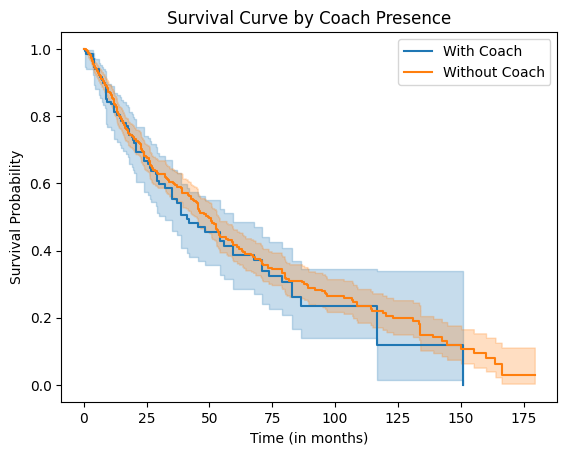

In [26]:
# Plot the retention curves
ax = kmf_with_coach.plot()
kmf_without_coach.plot(ax=ax)

plt.xlabel('Time (in months)')
plt.ylabel('Survival Probability')
plt.title('Survival Curve by Coach Presence')
plt.legend()
plt.show()

#Interpreting the results:
# - compare the two survival curves. If the curve for With Coach is consistently above the curve for Wihtout Coach, it suggests that having a coach is associated with a higher probability of employee surviving (not experiencing turnover) over time.